In [24]:
import pandas as pd

In [49]:
#for timeseries plot
import matplotlib.pyplot as plt
import datetime
import calendar
import seaborn

In [25]:
#for bavarian holiday calculation
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar, EasterMonday, Easter, Day
from pandas.tseries.offsets import CustomBusinessDay

In [26]:
df1=pd.read_csv('F:\Hajara\Data_Science\online_retail_09_10.csv')

In [27]:
df2=pd.read_csv('F:\Hajara\Data_Science\online_retail_10_11.csv')

In [5]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [6]:
by_invoiceno = df1.groupby('InvoiceNo')
by_invoiceno.describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000007671E04400>>

In [7]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df1.shape

(525461, 8)

In [9]:
df2.shape

(541910, 8)

In [10]:
df1_dup=df1

In [11]:
df1_dup.shape

(525461, 8)

In [12]:
df2_dup=df2

In [28]:
concatenated = pd.concat([df1, df2])

In [14]:
concatenated.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [29]:
concatenated.shape#df1=525461 rows,df2 rows =541910, 525461+541910=1067371 rows in concatenated

(1067371, 8)

In [30]:
with open('F:\Hajara\Data_Science\concatenated_sales_09_to_11.csv', 'w', encoding='utf-8') as f:
    concatenated.to_csv(f, index=False)

In [31]:
# 1. added AM or PM column using list comprehension.
#Create a new column that tells me AM or PM (assume AM is between 6AM and 11:59 AM, and PM is between 12:00PM and 11:59PM) 

concatenated['AM or PM'] = ['AM' if x in [6,7,8,9,10,11] else 'PM' for x in pd.to_datetime(concatenated['InvoiceDate']).dt.hour]
concatenated

#Another solution with np:
#import numpy as np
#concatenated['color'] = np.where(pd.to_datetime(concatenated['InvoiceDate']).dt.hour in [6,7,8,9,10,11],'AM','PM')
# which one is better?

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AM or PM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,AM
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,AM
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,AM
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,AM
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,AM
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,PM
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,PM
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,PM
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,PM


In [32]:
#2. Create a new column that tells me if it is a holiday (according to Bavarian calendar)
class BavarianCalendar(AbstractHolidayCalendar):
        rules = [Holiday('New Year', month=1, day=1),
                 Holiday('Three Kings Day', month=1, day=6),
                 Holiday('Good Friday', month=1, day=1, offset=[Easter(), Day(-2)]),
                 EasterMonday,
                 Holiday('Labour Day', month=5, day=1),
                 Holiday('Ascension Day', month=1, day=1, offset=[Easter(), Day(+39)]),
                 Holiday('Whit Monday', month=1, day=1, offset=[Easter(), Day(+50)]),
                 Holiday('Corpus Christi', month=1, day=1, offset=[Easter(), Day(+60)]),
                 Holiday('Assumption Day', month=9, day=15),
                 Holiday('Day of German Unity', month=10, day=3),
                 Holiday('All Saints Day', month=11, day=1),
                 Holiday('Christmas Day', month=12, day=25),
                 Holiday('2nd Day of Christmas', month=12, day=26)
                         ]

In [33]:
cal = BavarianCalendar()

In [56]:
holidays = cal.holidays( pd.to_datetime(concatenated['InvoiceDate']).dt.date.min(), pd.to_datetime(concatenated['InvoiceDate']).dt.date.max())

In [57]:
concatenated['isHoliday'] = pd.to_datetime(concatenated['InvoiceDate']).dt.date.astype('datetime64').isin(holidays)

In [58]:
concatenated

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AM or PM,isWeekend,season,total_price,isHoliday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,AM,False,winter,83.40,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,AM,False,winter,81.00,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,AM,False,winter,81.00,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,AM,False,winter,100.80,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,AM,False,winter,30.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,PM,False,winter,12.60,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,PM,False,winter,16.60,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,PM,False,winter,16.60,False
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,PM,False,winter,14.85,False


In [59]:
concatenated[concatenated['isHoliday']==True]
#showing the invoices on holidays

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AM or PM,isWeekend,season,total_price,isHoliday
46834,493718,21484,CHICK GREY HOT WATER BOTTLE,4,2010-01-06 09:45:00,3.45,13267.0,United Kingdom,AM,False,winter,13.80,True
46835,493718,21781,MA CAMPAGNE CUTLERY BOX,1,2010-01-06 09:45:00,14.95,13267.0,United Kingdom,AM,False,winter,14.95,True
46836,493718,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-06 09:45:00,3.25,13267.0,United Kingdom,AM,False,winter,26.00,True
46837,493718,84836,ZINC METAL HEART DECORATION,12,2010-01-06 09:45:00,1.25,13267.0,United Kingdom,AM,False,winter,15.00,True
46838,493718,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,6,2010-01-06 09:45:00,2.55,13267.0,United Kingdom,AM,False,winter,15.30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433454,573918,21733,RED HANGING HEART T-LIGHT HOLDER,2,2011-11-01 17:20:00,2.95,17576.0,United Kingdom,PM,False,autumn,5.90,True
433455,573918,23096,PETIT TRAY CHIC,4,2011-11-01 17:20:00,1.65,17576.0,United Kingdom,PM,False,autumn,6.60,True
433456,573918,23348,CHILDRENS TOY COOKING UTENSIL SET,6,2011-11-01 17:20:00,2.08,17576.0,United Kingdom,PM,False,autumn,12.48,True
433457,573919,21352,check,-23,2011-11-01 17:39:00,0.00,NaN,United Kingdom,PM,False,autumn,-0.00,True


In [38]:
# 3- Create a new column that tells me if it is a weekend
concatenated['isWeekend'] = (pd.to_datetime(concatenated['InvoiceDate']).dt.dayofweek // 5 == 1)

In [39]:
concatenated[concatenated['isWeekend']==True]
#showing the invoices on weekends

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AM or PM,isWeekend
12061,490363,84950,ASSORTED COLOUR T-LIGHT HOLDER,192,12/5/2009 10:11,0.72,13199.0,United Kingdom,AM,True
12062,490364,48185,DOOR MAT FAIRY CAKE,4,12/5/2009 10:25,6.75,13487.0,United Kingdom,AM,True
12063,490364,84836,ZINC METAL HEART DECORATION,12,12/5/2009 10:25,1.25,13487.0,United Kingdom,AM,True
12064,490364,22415,WHITE TISSUE REAM,1,12/5/2009 10:25,7.95,13487.0,United Kingdom,AM,True
12065,490364,48187,DOOR MAT NEW ENGLAND,4,12/5/2009 10:25,6.75,13487.0,United Kingdom,AM,True
...,...,...,...,...,...,...,...,...,...,...
524198,580537,23266,SET OF 3 WOODEN STOCKING DECORATION,1,12/4/2011 16:08,1.25,NaN,United Kingdom,PM,True
524199,580537,23267,SET OF 4 SANTA PLACE SETTINGS,1,12/4/2011 16:08,1.25,NaN,United Kingdom,PM,True
524200,580537,23312,VINTAGE CHRISTMAS GIFT SACK,2,12/4/2011 16:08,4.15,NaN,United Kingdom,PM,True
524201,580537,23319,BOX OF 6 MINI 50'S CRACKERS,1,12/4/2011 16:08,2.49,NaN,United Kingdom,PM,True


In [40]:
# 4- Create a new column that tells me the season (Summer, Fall, Winter, Spring)
def find_season(month):
    if month in (3,4,5):
        season = "spring"
    elif month in (6,7,8):
        season = "summer"
    elif month in (9,10,11):
        season = "autumn"
    else:
        season = "winter"
    return season

In [41]:
concatenated['season'] = pd.to_datetime(concatenated['InvoiceDate']).dt.month.apply(find_season)

In [42]:
concatenated[concatenated['season']=="autumn"]
#showing sales made in autumn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AM or PM,isWeekend,season
323734,520898,22143,NaN,-88,9/1/2010 9:22,0.00,NaN,United Kingdom,AM,False,autumn
323735,520899,20724,RED SPOTTY CHARLOTTE BAG,10,9/1/2010 9:25,0.85,12645.0,Germany,AM,False,autumn
323736,520899,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,9/1/2010 9:25,1.65,12645.0,Germany,AM,False,autumn
323737,520899,22555,PLASTERS IN TIN STRONGMAN,12,9/1/2010 9:25,1.65,12645.0,Germany,AM,False,autumn
323738,520899,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,9/1/2010 9:25,4.95,12645.0,Germany,AM,False,autumn
...,...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,11/30/2011 17:39,0.85,15676.0,United Kingdom,PM,False,autumn
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,11/30/2011 17:39,3.29,15676.0,United Kingdom,PM,False,autumn
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,11/30/2011 17:42,1.25,16717.0,United Kingdom,PM,False,autumn
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,11/30/2011 17:42,7.95,16717.0,United Kingdom,PM,False,autumn


In [43]:
#5- Create a monthly timeseries graph which shows sales
#calculate sales total amount for each row by multipliying quantity into Unitprice
concatenated['total_price']=concatenated['Quantity']*concatenated['UnitPrice']

In [44]:
pd.to_datetime(concatenated['InvoiceDate']).dt.year.nunique()

3

In [45]:
concatenated['InvoiceDate']=pd.to_datetime(concatenated['InvoiceDate'])

In [46]:
GB=concatenated.groupby([concatenated.InvoiceDate.dt.year,concatenated.InvoiceDate.dt.month])['total_price'].sum()

In [47]:
GB

InvoiceDate  InvoiceDate
2009         12              799847.110
2010         1               624032.892
             2               533091.426
             3               765848.761
             4               590580.432
             5               615322.830
             6               679786.610
             7               575236.360
             8               656776.340
             9               853650.431
             10             1045168.350
             11             1422654.642
             12             1126445.470
2011         1               560000.260
             2               498062.650
             3               683267.080
             4               493207.121
             5               723333.510
             6               691123.120
             7               681300.111
             8               682680.510
             9              1019687.622
             10             1070704.670
             11             1461756.250
             12

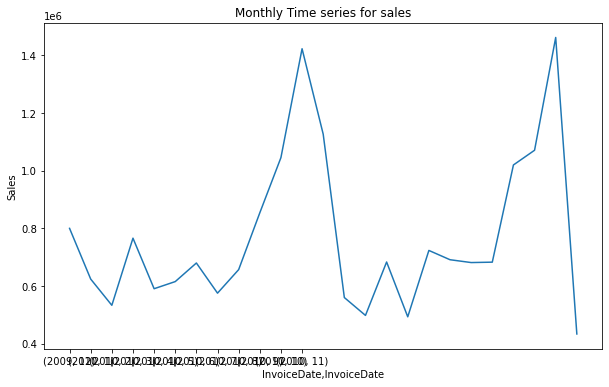

In [50]:

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Months')
months = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(12))
ax.set_xticklabels(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Time series for sales')
plt.grid(True)
GB.plot()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

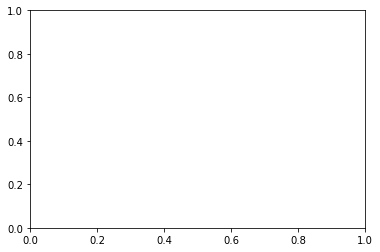

In [60]:
#6- Create a barchart that compares sales between different holidays (regardless of year)
groupby_holiday = concatenated[concatenated['isHoliday']==True]
groupby_sales = groupby_holiday['total_price'].sum()
#year_2009.set_index("InvoiceDate").groupby([pd.Grouper(freq="M")]).sum().sort_values('total_price').reset_index()
#sales_holiday.set_index.groupby_holiday['total_price'].sum().reset_index()
plt.bar(groupby_holiday, groupby_sales, width=0.50, edgecolor='k', linewidth=2)